![Banner](https://i.imgur.com/a3uAqnb.png)

# REINFORCE Algorithm Implementation - Homework Assignment

In this homework, you will implement the **REINFORCE** algorithm using PyTorch to train an agent to play the Lunar Lander game. This will involve understanding policy gradient methods, implementing Monte Carlo sampling, and optimizing the training process.

## 📌 Project Overview
- **Task**: Train an RL agent to land a spacecraft safely using policy gradients
- **Algorithm**: REINFORCE (Monte Carlo Policy Gradient)
- **Environment**: LunarLander-v3 from OpenAI Gym
- **Goal**: Achieve consistent successful landings (score > 200)

## 📚 Learning Objectives
By completing this assignment, you will:
- Understand policy gradient methods and the REINFORCE algorithm
- Implement Monte Carlo return calculation
- Apply policy gradient theorem for policy optimization
- Use return normalization for stable training
- Evaluate policy-based reinforcement learning agents
- Visualize training progress and agent behavior

## 🎯 Key Differences from Value-Based Methods
- **Direct Policy Optimization**: Unlike DQN which learns Q-values, REINFORCE directly optimizes the policy
- **Monte Carlo Returns**: Uses complete episode returns rather than bootstrapping
- **Stochastic Policy**: Outputs probability distributions over actions
- **Policy Gradient**: Updates policy parameters using gradient ascent on expected returns

## Lunar Lander

This environment is a classic rocket trajectory optimization problem. The landing pad is always at coordinates (0,0). The state is an 8-dimensional vector: the coordinates of the lander in x & y, its linear velocities in x & y, its angle, its angular velocity, and two booleans that represent whether each leg is in contact with the ground or not.

There are four discrete actions available:<br>
- 0: do nothing<br>
- 1: fire left orientation engine<br>
- 2: fire main engine<br>
- 3: fire right orientation engine<br>

After every step a reward is granted. The total reward of an episode is the sum of the rewards for all the steps within that episode.

For each step, the reward:

- is increased/decreased the closer/further the lander is to the landing pad.

- is increased/decreased the slower/faster the lander is moving.

- is decreased the more the lander is tilted (angle not horizontal).

- is increased by 10 points for each leg that is in contact with the ground.

- is decreased by 0.03 points each frame a side engine is firing.

- is decreased by 0.3 points each frame the main engine is firing.

The episode receive an additional reward of -100 or +100 points for crashing or landing safely respectively.

An episode is considered a solution if it scores at least 200 points.


You can read more the LunarLander environment [here](https://gymnasium.farama.org/environments/box2d/lunar_lander/)

![LunarLander](https://gymnasium.farama.org/_images/lunar_lander.gif)

## Reinforce

REINFORCE is an elegant algorithm for maximizing the expected return. We sample a trajectory $\tau$ . If we get a high reward, we try to make it more likely. If we get a low reward, we try to make it less likely.

We just need a policy that maximizes the expected return and we can do this by Gradient Ascent on Policy parameters.

![Algorthm](https://i.imgur.com/G9Ybar2.png)

[Image Source](https://colab.research.google.com/github/huggingface/deep-rl-class/blob/master/notebooks/unit4/unit4.ipynb)

In [ ]:
# TODO: Install required packages (uncomment if needed):
# !pip install -q swig
# !pip install -q gym[box2d]
# !pip install -q pygame
# !pip install -q moviepy

# TODO: Import all necessary libraries:
#       - gymnasium for the environment (updated gym interface)
#       - torch, torch.nn, torch.optim for neural networks
#       - torch.nn.functional for activation functions
#       - torch.distributions for probability distributions
#       - math, random, numpy for utilities
#       - matplotlib for plotting
#       - collections.deque for efficient data structures
#       - anything else you need

# TODO: Set random seeds for reproducibility
# TODO: Check if GPU is available and set device

Using device: cuda


## 1️⃣ Environment Setup

**Task**: Create and explore the Lunar Lander environment.

**Requirements**:
- Initialize the LunarLander-v3 environment
- Understand the state space (8-dimensional vector)
- Understand the action space (4 discrete actions)
- Explore the reward structure and episode termination conditions

In [ ]:
# TODO: Create the Lunar Lander environment
#       - Use gym.make("LunarLander-v3")
#       - Print environment information

# TODO: Print environment details:
#       - Action space size
#       - Observation space shape
#       - Reset environment and print initial state

# TODO: Reset environment and examine initial state

# TODO: Explore one random step

Action space size: 4
Observation space shape: (8,)
Initial state: [-4.4059754e-05  1.4104902e+00 -4.4691386e-03 -1.9114794e-02
  5.7748959e-05  1.0123340e-03  0.0000000e+00  0.0000000e+00]
State dimension: 8
Random action: 3
Reward: -2.56881271228434
Terminated: False


## 2️⃣ Policy Network Architecture

**Task**: Design the neural network that will represent our stochastic policy.

**Requirements**:
- Create a feedforward neural network that outputs action probabilities
- Input: 8-dimensional state vector (LunarLander observations)
- Output: 4-dimensional probability distribution over actions
- Use softmax activation for valid probability distribution
- Implement action sampling and log-probability calculation

In [ ]:
# TODO: Implement Policy class inheriting from nn.Module:

# TODO: Initialize the network layers:
#       - fc1: Linear(s_size, h_size) - First hidden layer
#       - fc2: Linear(h_size, a_size) - Output layer
#       - add any as you need.

# TODO: Implement forward pass:
#       - Apply ReLU activation to first layer
#       - Apply softmax to output layer for probability distribution

# TODO: Convert state to tensor and add batch dimension

# TODO: Get action probabilities from forward pass

# TODO: Create categorical distribution and sample action

# TODO: Return action and its log probability

# TODO: Test the policy network architecture

Policy network created with 4996 parameters


## 3️⃣ Hyperparameters and Training Setup

**Task**: Set up hyperparameters and initialize the training components.

**Requirements**:
- Define appropriate hyperparameters for stable REINFORCE training
- Initialize policy network with proper architecture
- Set up optimizer with suitable learning rate
- Configure training parameters (episodes, max steps, etc.)

In [ ]:
# TODO: Define hyperparameters:

# TODO: Initialize policy network and optimizer:
#       - Create policy network with specified architecture
#       - Use Adam optimizer with specified learning rate

## 4️⃣ REINFORCE Algorithm Implementation

**Task**: Implement the core REINFORCE training function.

**Requirements**:
- Collect complete episodes using current policy
- Calculate Monte Carlo returns with discount factor
- Implement return normalization for training stability
- Compute policy gradient loss using log probabilities
- Perform policy parameter updates using gradient ascent
- Track training progress and episode statistics

In [ ]:
# TODO: Initialize tracking variables:
#       - scores_deque: Rolling window of recent scores
#       - scores: Complete list of all episode scores

# TODO: Main training loop over episodes

# TODO: Initialize episode-specific variables:
#       - saved_log_probs: Store log probabilities of actions taken
#       - rewards: Store rewards received during episode

# TODO: Reset environment and handle potential tuple return

# TODO: Episode execution loop

# TODO: Select action using current policy

# TODO: Execute action in environment

# TODO: Handle different return formats from environment

# TODO: Store reward and check for episode termination

# TODO: Calculate episode statistics

# TODO: Calculate Monte Carlo returns (discounted cumulative rewards):
#       - Work backwards from end of episode
#       - Apply discount factor gamma to future returns

# TODO: Normalize returns for training stability:
#       - Convert to tensor and normalize (zero mean, unit variance)
#       - Add small epsilon to prevent division by zero

# TODO: Calculate policy loss:
#       - REINFORCE uses negative log probability weighted by return
#       - Sum over all timesteps in the episode

# TODO: Perform optimization step:
#       - Clear gradients, compute gradients, update parameters

# TODO: Print progress at specified intervals

## 5️⃣ Training Execution

**Task**: Execute the REINFORCE training process.

**Requirements**:
- Run training for the specified number of episodes
- Monitor training progress and convergence
- Track episode scores and performance metrics
- Handle training time efficiently (this may take 15-30 minutes)

In [ ]:
# TODO: Execute training with progress tracking

# TODO: Train the agent using REINFORCE algorithm

Starting REINFORCE training...
Episode 100	Average Score: -156.27
Episode 200	Average Score: -139.59
Episode 300	Average Score: -120.66
Episode 400	Average Score: -66.81
Episode 500	Average Score: -66.21
Episode 600	Average Score: -58.01
Episode 700	Average Score: -19.51
Episode 800	Average Score: 30.46
Episode 900	Average Score: 45.20
Episode 1000	Average Score: 25.46
Episode 1100	Average Score: 84.03
Episode 1200	Average Score: 94.81
Episode 1300	Average Score: 58.98
Episode 1400	Average Score: 92.87
Episode 1500	Average Score: 123.87
Episode 1600	Average Score: 170.53
Episode 1700	Average Score: 213.82
Episode 1800	Average Score: 207.66
Episode 1900	Average Score: 218.25
Episode 2000	Average Score: 231.59
Training completed!
Final average score over last 100 episodes: 231.59


## 6️⃣ Training Results Visualization

**Task**: Create comprehensive visualizations of the training progress.

**Requirements**:
- Plot episode scores over training
- Analyze learning curves and convergence

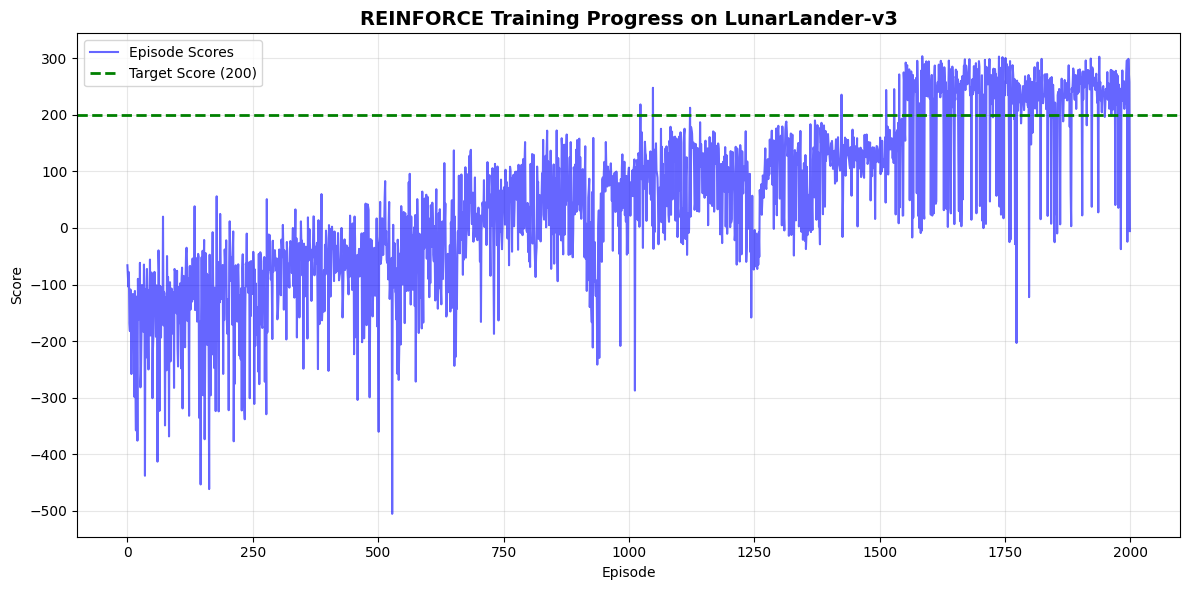

In [ ]:
# TODO: Create comprehensive training visualization

# TODO: Plot raw scores

# TODO: Add horizontal line at target performance (200 points)

# TODO: Customize plot appearance

## 7️⃣ Agent Testing and Video Generation

**Task**: Test the trained agent and create a video visualization.

**Requirements**:
- Test the trained agent using the learned policy (no exploration)
- Record the agent's performance in the environment
- Create a video of the agent playing
- Analyze the agent's final performance

In [ ]:
# TODO: Set up video recording environment
from gymnasium.wrappers import RecordVideo
from IPython.display import HTML
from IPython import display
import glob
import base64, io, os
import gymnasium as gym

# Set environment variable for headless rendering
os.environ['SDL_VIDEODRIVER'] = 'dummy'

def show_video():
    """Display recorded video in Jupyter notebook."""
    mp4list = glob.glob('video*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        display.display(HTML(data='''<video alt=\"Trained REINFORCE Agent\" autoplay 
                loop controls style=\"height: 400px;\">
                <source src=\"data:video/mp4;base64,{0}\" type=\"video/mp4\" />
             </video>'''.format(encoded.decode('ascii'))))
    else: 
        print("Could not find video")

def wrap_env(env):
    """Wrap environment for video recording."""
    env = RecordVideo(env, video_folder="./", episode_trigger=lambda x: True, name_prefix="video")
    return env


# TODO: Test the trained agent

# TODO: Create test environment with rendering

# TODO: Run test episode

# TODO: Use trained policy (REINFORCE agent) - deterministic action selection

# TODO: Execute action

# TODO: Check if episode finished

# TODO: Update state

vid.close()

print(f"\nTrained agent performance: {total_reward:.2f} points")

Testing Trained REINFORCE Agent...


/home/ali/miniconda3/envs/PyTorchENV/lib/python3.11/site-packages/gymnasium/wrappers/rendering.py:296: UserWarning: WARN: Overwriting existing videos at /home/ali folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Episode finished after 468 timesteps
Total reward: 189.47

Trained agent performance: 189.47 points


## 8️⃣ Display Training Video

**Task**: Show the recorded video of the trained agent.

**Requirements**:
- Display the video inline in the notebook
- Verify that the agent has learned effective landing behavior

In [10]:
# TODO: Display the recorded video
show_video()

## 9️⃣ Action Selection Analysis

**Task**: Analyze the trained agent's action selection patterns and decision-making.

**Requirements**:
- Track action frequencies during test episodes
- Visualize action distribution patterns
- Understand the agent's learned strategy
- Compare action selection across different states

Analyzing Action Selection Patterns...


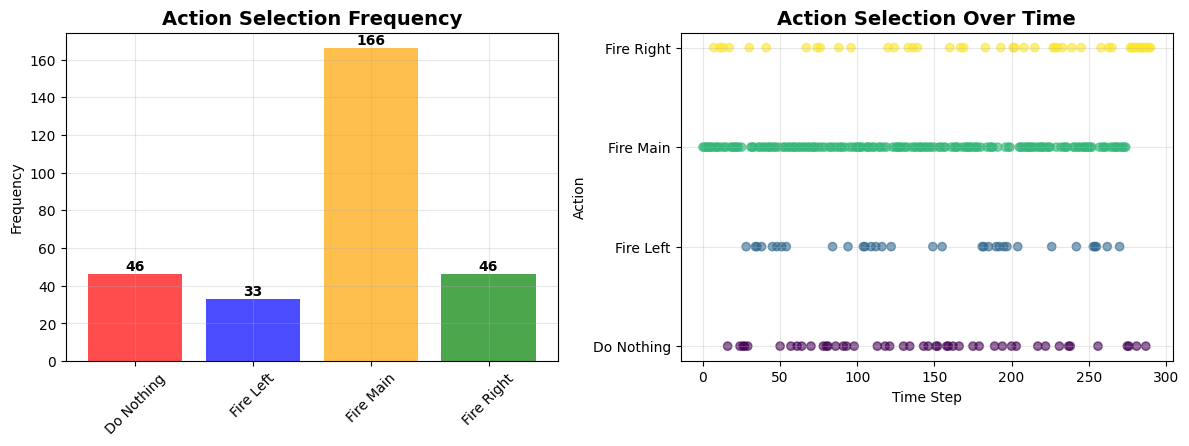

In [ ]:
# TODO: Analyze action selection patterns

# TODO: Run episode and track all actions

# TODO: Get action probabilities and select action using REINFORCE policy

# TODO: Track action and state

# TODO: Execute action

# TODO: Visualize action distribution

# TODO: Add value labels on bars

# TODO: Plot action selection over time

## 📋 Assignment Evaluation Criteria

Your REINFORCE homework will be evaluated based on the following criteria:

### **Implementation Correctness (40%)**
- ✅ Proper REINFORCE algorithm implementation
- ✅ Correct Monte Carlo return calculation with discounting
- ✅ Appropriate policy network architecture and forward pass
- ✅ Proper policy gradient computation and optimization
- ✅ Return normalization for training stability

### **Training Performance (25%)**
- ✅ Agent trains without errors for specified episodes
- ✅ Achieves reasonable performance (average reward > 100) after training
- ✅ Shows clear learning progress over time
- ✅ Proper use of hyperparameters

### **Code Quality and Documentation (20%)**
- ✅ Clean, readable code with comprehensive comments
- ✅ Proper tensor handling and device management
- ✅ Efficient implementation without memory leaks
- ✅ Well-structured functions and classes

### **Analysis and Understanding (15%)**
- ✅ Comprehensive training visualizations
- ✅ Thoughtful action selection analysis